<a href="https://colab.research.google.com/github/ajitrachmatsyah/Portfolio2/blob/main/Concrete%20Mixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🏗️ **CONCRETE MIXTURE**

# Impact of Cement Substitute Material on Concrete Compressive Strength
***

## Objective
***


This notebook aims to explore dataset of 1030 concrete compressive strength report from various mixtures and age to find out the effect of cement substitute material (in this case slag and fly ash) to the 28 days concrete compressive strength.

The question that will be answered by this notebook are as follows:
1. Does having a higher cement will results in concrete with higher strength?
2. What is the impact of adding a higher percentage of cement substitute material (slag and flyash) to the concrete strength?

The dataset used in this notebook can be found in the following link : https://www.kaggle.com/datasets/niteshyadav3103/concrete-compressive-strength

Skill shown in this exercise are as follows : pandas, matplotlib, seaborn.

## Analysis
***
**1. Load Data from Source**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy.stats import linregress

# reading the XLSX file
drive.mount('/content/gdrive', force_remount=True)
file =('gdrive/MyDrive/Colab_Notebooks/concrete.csv')
df = pd.read_csv(file)

# displaying the contents of the XLSX file
df.head()

Mounted at /content/gdrive


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


**2. Check Missing Values**

In [ ]:
# Check whether missing values present within the dataset.
print(df.isnull().sum())

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


No missing values present in dataset.

**3. Show data size and column properties**

This code is made to identify the correlation between ratio of cement : aggregate : water and compare it to its final compressive strength. To reach that goal the following steps is executed within this code:
Skill Expressed : Pandas, Matplotlib, Seaborn, Scipy
1. Filter the dataframe to only shows relevant column.
2. Calculate new column for ratio of cement : aggregate : water.
3. Categorize age into 1-3 days, 4-7 days, 7-14 days, 14-28 days, and 28+ days.
4. Visualize the results with Matplotlib.
5. Point out results.


In [ ]:
# Show the statistical summarization of the data
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Based on the table above it can be observed that the data has 9 columns and 1030 rows. The columns is described as follows:

1. cement : Quantity of cement in the mixture (Kg/m3). Cement act as binder to the concrete mix. data ranges from 102 - 540 with a mean of 281.16.
2. slag : Quantity of slag in the mixture (Kg/m3). Slag is a by-product of blast-furnace and can be used to partially substitute cement. data ranges from 0 - 359 with a mean of 73.89.
3. ash : Quantity of fly ash in the mixture (Kg/m3). Fly ash is a by-product of coal combustion process and can be used to partially substitute cement. data ranges from 0 - 200 with a mean of 54.18.
4. water : Quantity of water in the mixture (Kg/m3). data ranges from 121.8 - 247 with a mean of 181.56.
5. superplastic : Quantity of superplasticizer in the mixture (Kg/m3). data ranges from 0 - 32.2 with a mean of 6.2.
6. coarseagg : Quantity of coarse aggregate in the mixture (Kg/m3). data ranges from 801 - 1145 with a mean of 972.9.
7. fineagg : Quantity of fine aggregate in the mixture (Kg/m3). data ranges from 594 - 992.6 with a mean of 773.58.
8. age : Days passed between the concrete mixture production and testing (Days). Intended strength achieved on the age of 28 days, but early strength of concrete can be increased with particular chemical agent. data ranges from 1 - 356 with a mean of 45.6
9. strength : Strength of concrete recorded from a compressive strength test (MPa). Strength of concrete is determined based on mixture composition and age.

**4. Group the dataframe by age**

In [ ]:
# Group the dataframe by age
df.groupby("age")["cement"].count().reset_index(name = "number of data")

,age,number of data
0,1,2
1,3,134
2,7,126
3,14,62
4,28,425
5,56,91
6,90,54
7,91,22
8,100,52
9,120,3


For the purposes of analysis only data with age equal to 28 will be considered (425 data). The rest of the data will be dropped.

In [ ]:
# Drop every row with age not equal 28 days
df.drop(df[df.age != 28].index, inplace = True)
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65


**4. Add Total Weight and Cement Ratio Columns to the Dataset**

New columns is needed on the dataset and will be used to determine the relationship within the data on the future steps. The new column that will be added is as follows:

1. total_weight = Total weight in a 1 m3 mixture (Kg). Includes cement, slag, fly ash, water, coarse aggregate, and fine aggregate.
2. cement_ratio = Weight of cementiuous material in m3 mixture (cement + slag + fly ash) divided by total_weight (Kg).

In [ ]:
# Add new column to calculate total weight and cement ratio
df["Total weight"] = df["cement"] + df["slag"] + df["ash"] + df["coarseagg"] + df["fineagg"] + df["ash"] + df["water"]
df["Cement ratio"] = (df["cement"] + df["slag"] + df["ash"])/ df["Total weight"]

# Check the changes
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Total weight,Cement ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,2277.1,0.155153
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,2446.9,0.141281
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,2210.0,0.171946
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,2275.6,0.148620
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65,2338.0,0.126604


**5. Plot the relationship between cement ratio and strength**

We will try to plot the relationship between cement ratio and strength, it is expected the compressive strength of a concrete will be higher the more cement added into it.

<Axes: xlabel='Cement ratio', ylabel='strength'>

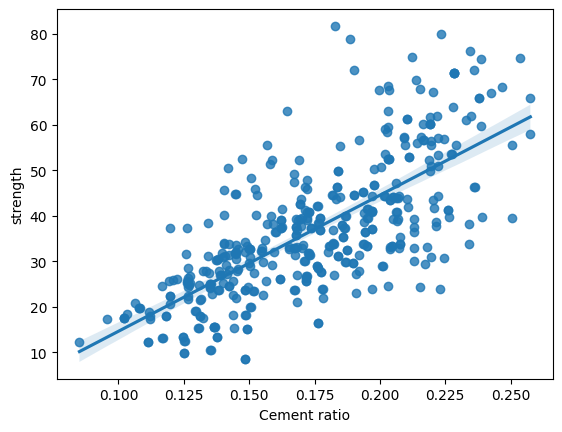

In [ ]:
# Plot the relationship between cement ratio and strength with seaborn
sns.regplot(data=df, x="Cement ratio", y="strength")

It can be seen from the figure above that based on this dataset of concrete with 28 days of age that our prediction is correct where its compressive strength have a positive correlation with its cement ratio percentage.

To try to delve further on this analysis, as we know from the previous section, the cement ratio value that we use on this dataframe are the combined value of cement, slag, and fly ash. Now we will try to check if there is connection between the percentage of substitute material (slag and fly ash) in a cement mixture to its strength.

**6. Add Percent cement column to dataframe**

Percent cement column determine the amount of cement divided by the total amount of cement, slag, and ash in a mixture. The higher the value the smaller substitute material (slag and fly ash) used in the mixture.

In [ ]:
# Add the list as a new column to the existing dataset
df["Percent cement"] = df["cement"]/(df["cement"]+df["slag"]+df["ash"])

# Check the changes
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Total weight,Cement ratio,Percent cement
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,2277.1,0.155153,0.399943
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,2446.9,0.141281,0.723170
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,2210.0,0.171946,0.700000
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,2275.6,0.148620,0.457717
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65,2338.0,0.126604,1.000000


**7. Plot the relationship between percent cement and strength**

Similar to what we have done in section 5, but now we show the distribution of the percent cement in the graph. The prediction is a mixture with high percent cement will tend to have a higher strength due to less substitute material used.

<Axes: xlabel='Cement ratio', ylabel='strength'>

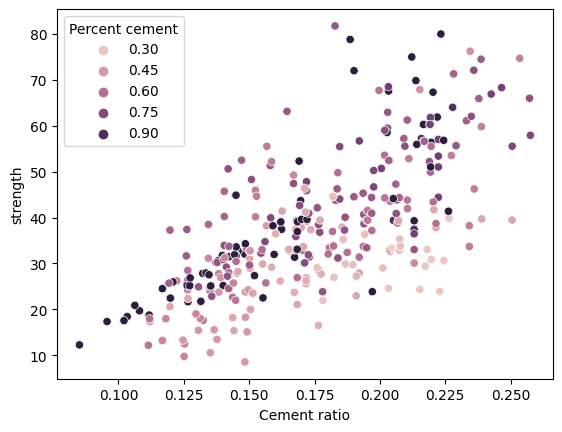

In [ ]:
# Plot the relationship between cement ratio and strength with seaborn
sns.scatterplot(data=df, x="Cement ratio", y="strength", hue="Percent cement")

As we can see on the figure above it seems that our prediction is correct as the darker dots (the one with higher percent cement) are having a significantly higher strength compared to the paler dots.

To be sure with its relationship we will try to plot a linear trendline for each percent cement category.

**8. Add a new column to categorize percent cement value**

We will try to categorize the percent cement value to three distinct bin which is >50% cement substitute, 25%-50% cement substitute, and <25% cement substitute.

In [ ]:
# Add new column called amount of substitute to categorize percent cement into 3 distinct bin
bins = [0, 0.5, 0.75, 1]
labels = ['>50% cement substitute', '25%-50% cement substitute', '<25% cement substitute']
df['Amount of substitute'] = pd.cut(x = df['Percent cement'], bins = bins, labels = labels, include_lowest = True)

# Check the changes
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Total weight,Cement ratio,Percent cement,Amount of substitute
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,2277.1,0.155153,0.399943,>50% cement substitute
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,2446.9,0.141281,0.723170,25%-50% cement substitute
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,2210.0,0.171946,0.700000,25%-50% cement substitute
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,2275.6,0.148620,0.457717,>50% cement substitute
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65,2338.0,0.126604,1.000000,<25% cement substitute


**9. Plot relationship of each category to the compressive strength**

Now we will plot the three distinct category we have defined in the previous seciton and find out if there is an influence in strength.

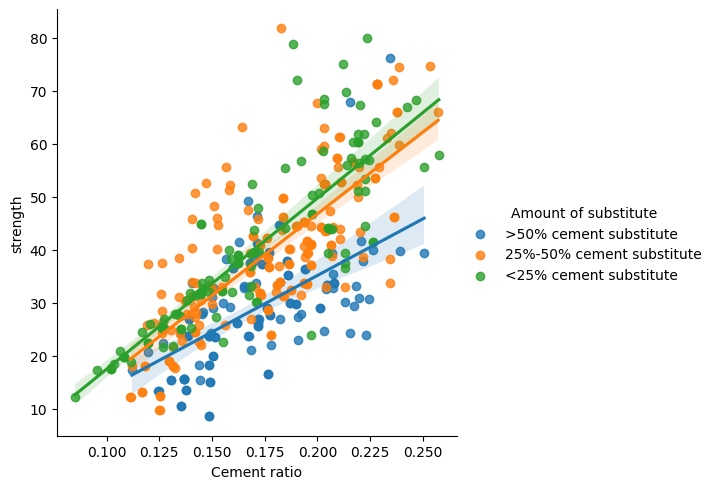

In [ ]:
# Plot the relationship between cement substitute ratio and strength with seaborn
sns.lmplot(data=df.query("age == 28"), x="Cement ratio", y="strength", hue="Amount of substitute")

As you can see in the figure above, as we predicted, the higher the percentage of cement substitute the lower the strength of the concrete. but, we can also see graphically that the difference between <25% cement substitute to 25%-50% cement substitute is not as high as the difference between 25%-50% to >50% cement substitute.

Let's try to figure out the linear equation for each trendline by redrawing the graph in matplotlib and catch the equation with scipy linregress.

Text(0, 0.5, 'Strength (MPa)')

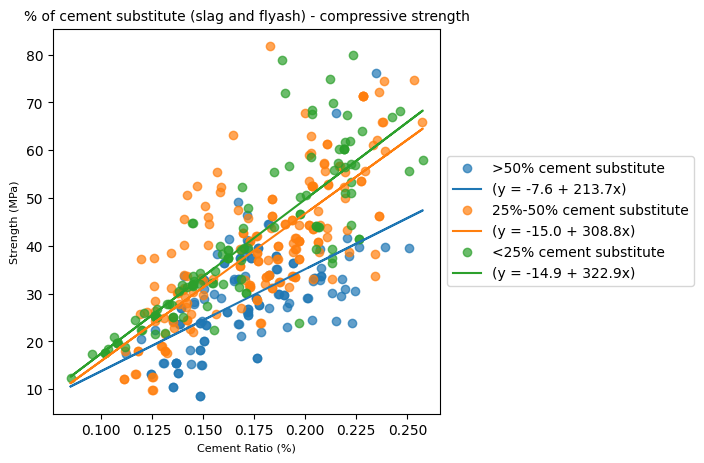

In [ ]:
# Plot the relationship between cement substitute ratio and strength with matplotlib
fig, ax = plt.subplots(figsize=(5, 5))

# Iterate through amount of substitute 3 unique value and plot both the point and the linear regression line
for i, j in enumerate(df['Amount of substitute'].unique()):
  x = df[df["Amount of substitute"] == j]["Cement ratio"]
  y = df[df["Amount of substitute"] == j]["strength"]
  linres = linregress(x,y)
  ax.plot(x,y,"o",zorder=0,alpha=0.7,color="C{}".format(i), label=j)
  ax.plot(df["Cement ratio"],linres.intercept+linres.slope*df["Cement ratio"],zorder=1,label="(y = {0:.1f} + {1:.1f}x)".format(linres.intercept,linres.slope))

# Format legend, title, and axis label
ax.legend(bbox_to_anchor=(1, 0.5), loc='center left', ncol=1)
ax.set_title("% of cement substitute (slag and flyash) - compressive strength", fontsize=10, wrap=True)  # Add a title to the axes.
plt.xlabel('Cement Ratio (%)', fontsize=8)
plt.ylabel('Strength (MPa)', fontsize=8)

##Conclusion
***

Based on this exercise, for this particular dataset for concrete with 28 days of age, a few point can be made as follows:
1. The compressive strength of the concrete is positively correlated with its cementitious material percentage (cement, slag, fly ash) within the mixture.
2. The percentage of substitute material (slag and fly ash) in cementitious material have a negative impact in its compressive strength. This influence is much more apparent in a cementitous material with >50% cement substitute. The empirical formula of cement ratio to strength is provided in step 9.

Thus, this exercise may be valuable for further research to organization that create regulation on cement substitute material on concrete mixture. As we know now, even though substitute material is environmentally friendly but its presence in a mixture, especially with a higher percentage, may harm the compressive strength of the final concrete product.